### Učitavanje biblioteka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis

C:\Users\spetr\AppData\Local\Temp\ipykernel_21452\3176179221.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Učitavanje skupa podataka

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Datasets/spotify_songs.csv')

### Provera podataka

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df.shape

(32833, 23)

#### Definicija problema

Ovaj projekat će se baviti problemom praćenja trendova u muzici. Svodi se na predikciju popularnosti neke pesme po određenim karakteristikama koje je opisuju.

#### Broj uzoraka i obeležja


In [ ]:
print(f"Broj uzoraka: {df.shape[0]}")
print(f"Broj obeležja: {df.shape[1]}")

Broj uzoraka: 32833
Broj obeležja: 23


In [ ]:
df['track_artist'].value_counts()

Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: track_artist, Length: 10692, dtype: int64

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
numerical_feats = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms']

df[numerical_feats].head().count()[0]

5

### Informacije o obeležjima

In [ ]:
print(f"{'Obeležje':<30}{'Tip podatka':<10}")
print("-----------------------------------------")

for column in df.columns:
  print(f"{column:<30}{str(df[column].dtype):<10}")


Obeležje                      Tip podatka
-----------------------------------------
track_id                      object    
track_name                    object    
track_artist                  object    
track_popularity              int64     
track_album_id                object    
track_album_name              object    
track_album_release_date      object    
playlist_name                 object    
playlist_id                   object    
playlist_genre                object    
playlist_subgenre             object    
danceability                  float64   
energy                        float64   
key                           int64     
loudness                      float64   
mode                          int64     
speechiness                   float64   
acousticness                  float64   
instrumentalness              float64   
liveness                      float64   
valence                       float64   
tempo                         float64   
duration_ms   

#### Numerička obeležja

In [ ]:
numerical_feats = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms']
print(f"Broj numeričkih obeležja je {len(numerical_feats)}")

Broj numeričkih obeležja je 9


### Kategorička obeležja

In [ ]:
df['mode'].value_counts()

1    18574
0    14259
Name: mode, dtype: int64

In [ ]:
df['track_name'].value_counts()

Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: track_name, Length: 23449, dtype: int64

#### Statistika za popularnost

In [ ]:
df['track_popularity'].describe()

count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

In [ ]:
df['track_popularity'].median()

45.0

#### Nedostajuće vrednosti

In [ ]:
print(df.isna().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [ ]:
print(df.isna().sum() / df.shape[0])

track_id                    0.000000
track_name                  0.000152
track_artist                0.000152
track_popularity            0.000000
track_album_id              0.000000
track_album_name            0.000152
track_album_release_date    0.000000
playlist_name               0.000000
playlist_id                 0.000000
playlist_genre              0.000000
playlist_subgenre           0.000000
danceability                0.000000
energy                      0.000000
key                         0.000000
loudness                    0.000000
mode                        0.000000
speechiness                 0.000000
acousticness                0.000000
instrumentalness            0.000000
liveness                    0.000000
valence                     0.000000
tempo                       0.000000
duration_ms                 0.000000
dtype: float64


#### Nevalidne vrednosti

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Datasets/spotify_songs.csv')
df.loc[df['duration_ms'] < 45000]
# danceability, speechiness, acousticness, liveness, valence, tempo, duration_ms

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2253,1rNNOKF4kiaNmdkpIKNsvd,raindrops (an angel cried),Ariana Grande,35,5KOu62BJwwCJTfyyAaEbZk,Sweetener,2018-08-17,Post Teen Pop,2Aud8PXoTGcyY5esHu4Aaz,pop,post-teen pop,0.336,0.2310,1,-6.217,1,0.0493,0.943000,0.0000,0.1830,0.4310,168.724,37640
8339,3yjYId62mEKEy9QwbCGoEa,The Screwed Up Click,DJ Screw & The Screwed Up Click,0,7K4OQmcNEpZrTjeyJraEul,Fallen Soldiers,2008-02-12,3rd Coast Classics,1QJ66s6YBZgxMUaVUyrhbo,rap,southern hip hop,0.514,0.7200,1,-8.507,1,0.2060,0.976000,0.0727,0.9100,0.9770,85.811,29493
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.000,0.3150,1,-26.087,1,0.0000,0.000000,0.0000,0.0000,0.0000,0.000,4000
24510,7EIBlyjSzRXbTCFrW2wZ01,No Guarantee - Remix Version,Chico DeBarge,0,5NXBYIr7OScDZfI02pIAKD,Long Time No See,1997-11-18,90s R&B - The BET Planet Groove/Midnight Love Mix,7LjRWGUdOmBdPG1W1bga4i,r&b,new jack swing,0.220,0.0286,1,-34.283,1,0.0562,0.943000,0.0000,0.2180,0.0383,128.899,31893
28117,7LEehgGg64Jc59WA6T8oaK,Interlude,Martin Numan,19,6Xa2lq5fMJrEynm2i7Fy38,The Black Hole,2018-03-19,House Electro 2019,72r6odw0Q3OWTCYMGA7Yiy,edm,electro house,0.590,0.8130,9,-5.619,0,0.2460,0.563000,0.5640,0.6110,0.1120,125.033,34560
28131,53WkNeHhYcflvfQFZRpjT9,Mortal Transition,Semser,16,2K2gRaa3xoO2XOb8VJ02VS,Blocksound,2018-04-27,House Electro 2019,72r6odw0Q3OWTCYMGA7Yiy,edm,electro house,0.508,0.9210,4,-6.438,0,0.0938,0.001230,0.6270,0.1690,0.3340,124.031,41250
28135,5G44KuviE2G7vZVj1PxpkH,WTF (Interlude),Semser,16,69acjhfJsxsZXMyruAE7tE,Reality,2018-07-25,House Electro 2019,72r6odw0Q3OWTCYMGA7Yiy,edm,electro house,0.273,0.4540,5,-13.214,1,0.0594,0.985000,0.9500,0.2750,0.0400,132.501,33750
28137,4ceZt0ptwiflIu7x6TBeLx,HIP3 (Interlude),Semser,15,69acjhfJsxsZXMyruAE7tE,Reality,2018-07-25,House Electro 2019,72r6odw0Q3OWTCYMGA7Yiy,edm,electro house,0.745,0.6370,10,-10.772,1,0.0645,0.221000,0.8240,0.0886,0.0759,114.016,42105
28142,4ecbiEfPKhsWXYKrGhZ18H,Poison (Interlude),Tetengo,18,5DHdv0N7qILNYb0IzMbR1T,Electroshow,2018-06-21,House Electro 2019,72r6odw0Q3OWTCYMGA7Yiy,edm,electro house,0.800,0.5880,7,-7.240,1,0.0768,0.094600,0.8260,0.1080,0.9070,128.068,31875
28148,5NMF5emWxHxUcivFDagVhE,This Is the End,Tetengo,16,5DHdv0N7qILNYb0IzMbR1T,Electroshow,2018-06-21,House Electro 2019,72r6odw0Q3OWTCYMGA7Yiy,edm,electro house,0.778,0.7890,0,-7.946,1,0.1390,0.000005,0.9450,0.1020,0.9620,128.030,33750


#### Izbacivanje nevalidnih i nedostajućih vrednosti

In [ ]:
columns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id']
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(axis=0, inplace=True)

rows_to_drop = df.loc[df['duration_ms'] < 20000].index
df.drop(rows_to_drop, inplace=True)

In [ ]:
print(f"Broj uzoraka nakon čišćenja: {df.shape[0]}")
print(f"Broj obeležja nakon čišćenja: {df.shape[1]}")

Broj uzoraka nakon čišćenja: 32832
Broj obeležja nakon čišćenja: 16


#### Analiza autlajera

Column: track_popularity
Number of outliers: 0
Percentage of outliers: 0.00%

Column: danceability
Number of outliers: 290
Percentage of outliers: 0.88%

Column: energy
Number of outliers: 277
Percentage of outliers: 0.84%

Column: loudness
Number of outliers: 1020
Percentage of outliers: 3.11%

Column: speechiness
Number of outliers: 3176
Percentage of outliers: 9.67%

Column: liveness
Number of outliers: 1843
Percentage of outliers: 5.61%

Column: valence
Number of outliers: 0
Percentage of outliers: 0.00%

Column: tempo
Number of outliers: 570
Percentage of outliers: 1.74%

Column: duration_ms
Number of outliers: 1386
Percentage of outliers: 4.22%



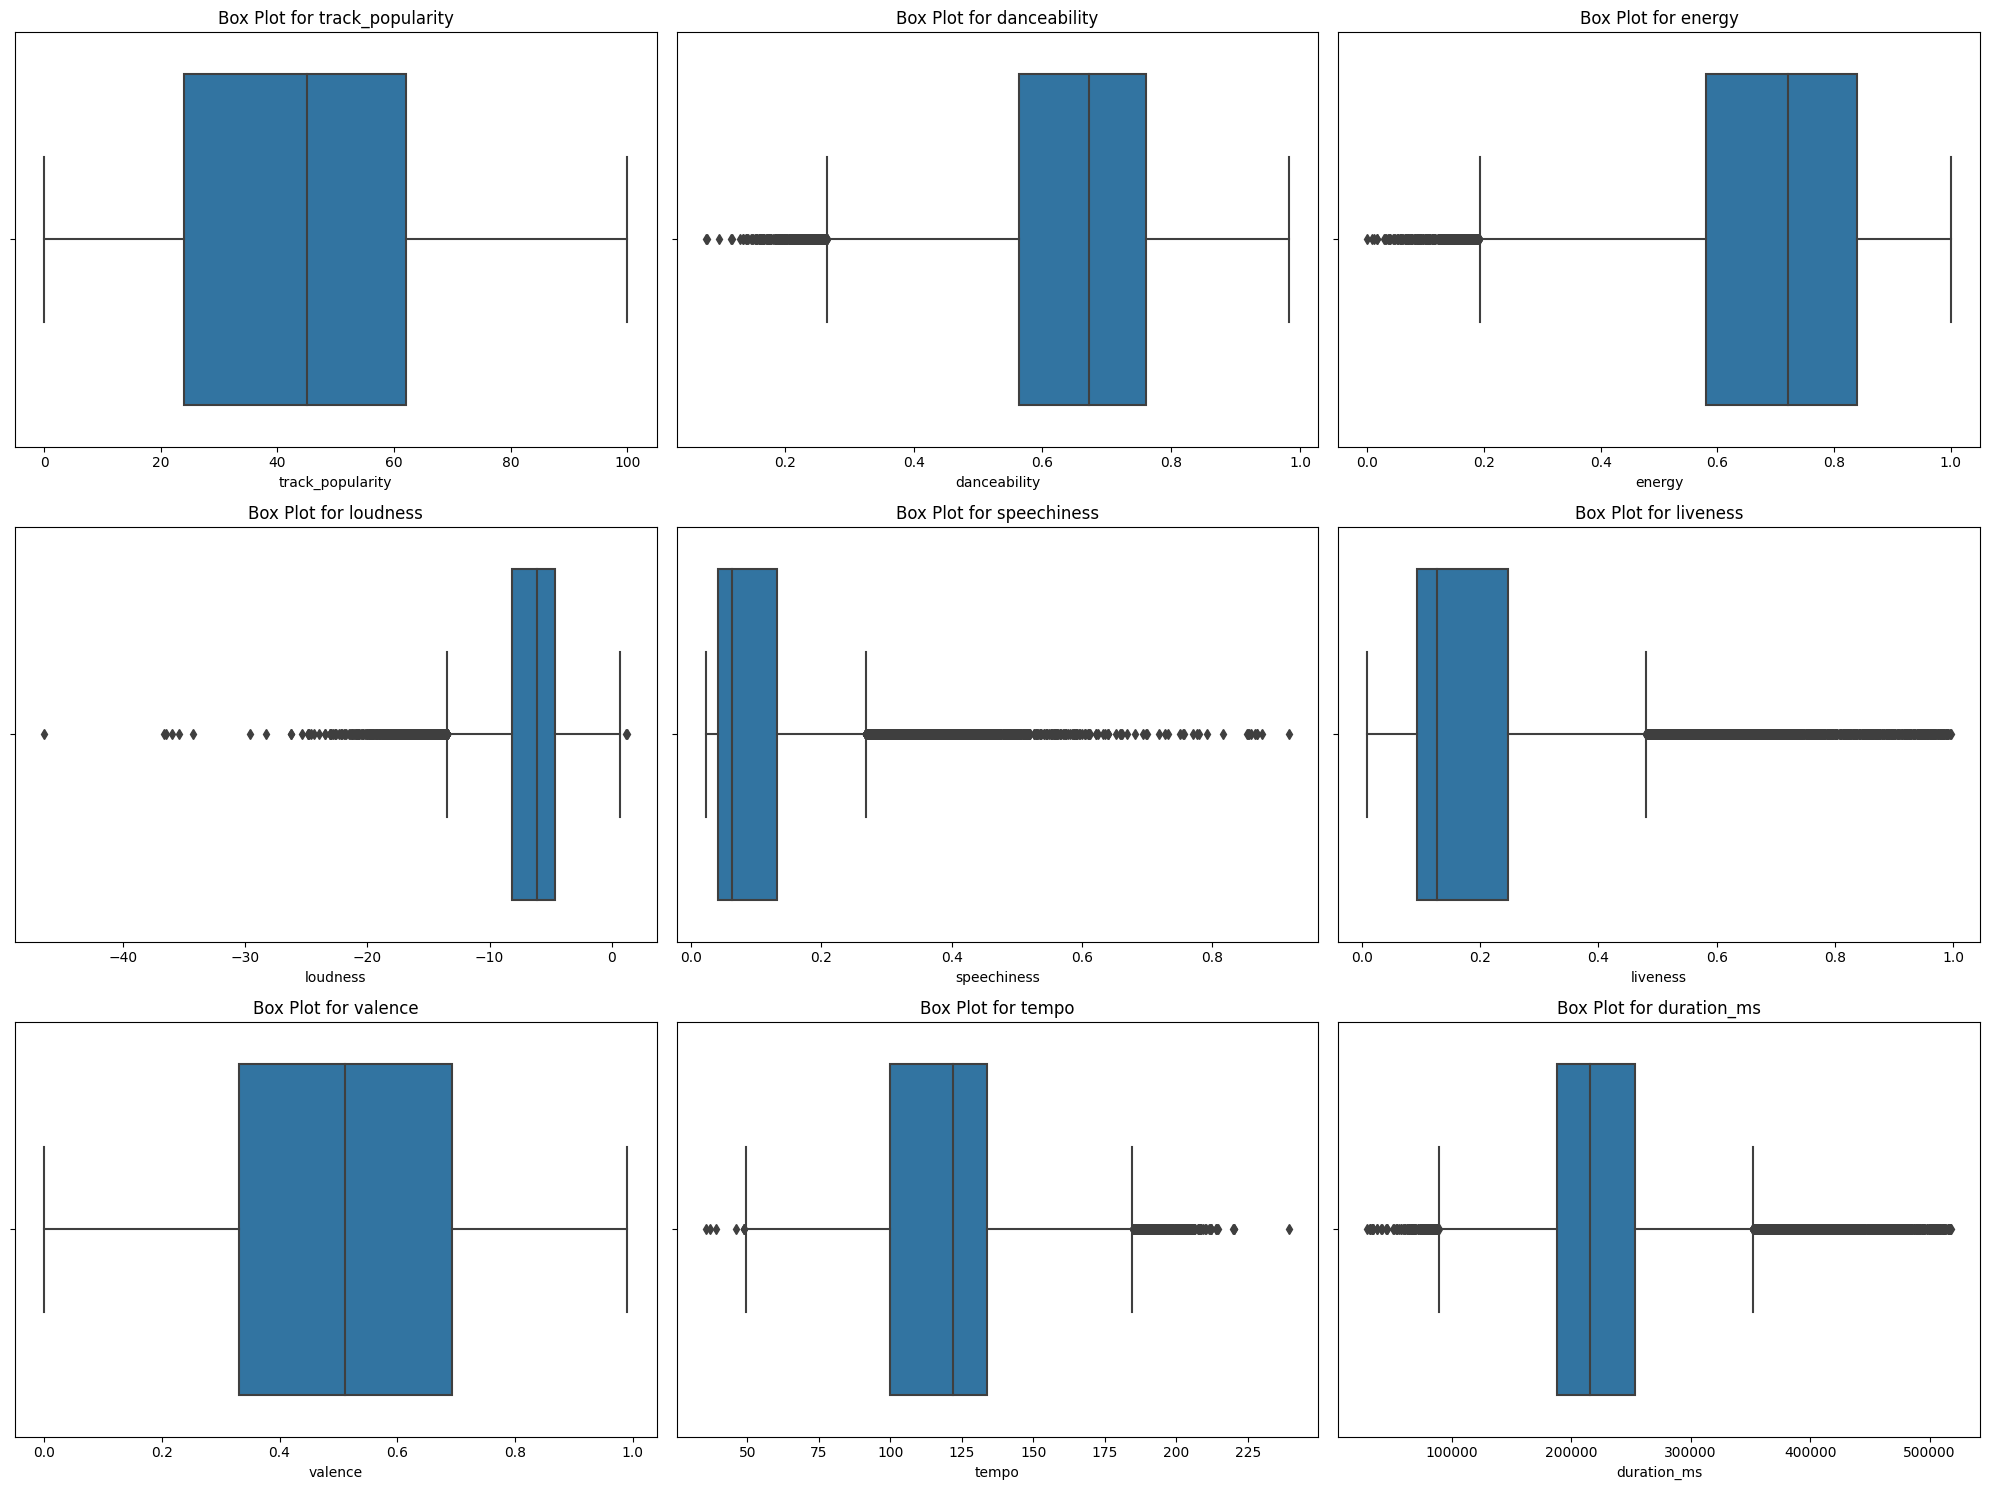

In [ ]:
num_plots_per_row = 3
num_rows = (len(numerical_feats) + num_plots_per_row - 1) // num_plots_per_row

plt.figure(figsize=(20, 5 * num_rows))

for i, column in enumerate(numerical_feats, 1):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers using the lower and upper bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Calculate the percentage of outliers
    percentage_outliers = (len(outliers) / len(df)) * 100

    # Box plot
    plt.subplot(num_rows, num_plots_per_row, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")

plt.tight_layout()
plt.show()


#### Korelisanost

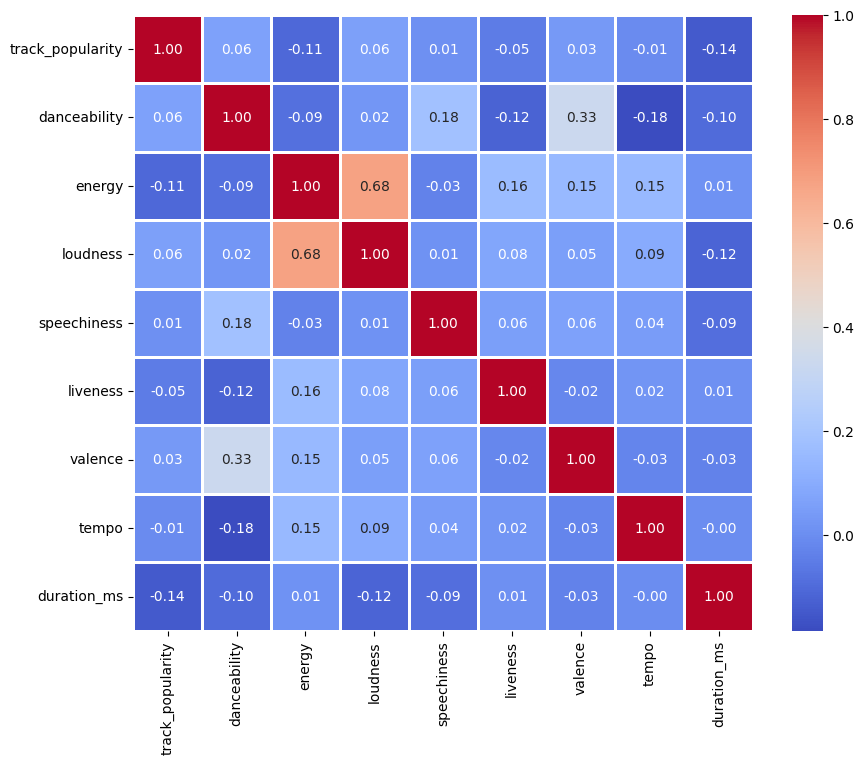

In [ ]:
numerical_values = df[numerical_feats]

correlation_matrix = numerical_values.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.show()

#### Asimetričnost i spljoštenost


In [ ]:
data = df['track_popularity']

skewness = skew(data)
kurt = kurtosis(data)

print(f"Asimetročnost: {round(skewness, 5)}")
print(f"Spljoštenost: {round(kurt, 5)}")


Asimetročnost: -0.23334
Spljoštenost: -0.93272
